# Least mean square

Resources:

- https://www.youtube.com/watch?v=yZ8_bFhcDHA

In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt

## Generate input, ouput, and impulse response

In [2]:
N = 100

np.random.seed(0)
x = np.random.randn(N)
h = np.array([1.0, 2.0, 0.5])
y = np.convolve(x, h, "same")

## Estimate impulse response

In [3]:
@numba.jit
def lms_filter(x, y, p):
    N = len(x)
    h_est = np.zeros(p)
    h_est_history = np.zeros((N, p))
    for n in range(p, N):
        x_buf = x[n:n-p:-1]
        # y_est = np.dot(h_est, x_buf) # Faster without numba
        y_est = np.sum(h_est * x_buf) # Faster with numba
        err = y[n-1] - y_est
        h_est = h_est + 0.2*x_buf*err
        h_est_history[n] = h_est
    return h_est, h_est_history

h_est, h_est_history = lms_filter(x, y, len(h))

In [4]:
%timeit -n10 -r10 lms_filter(x, y, len(h))

37.2 µs ± 7.13 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


[1.  2.  0.5]
[1.00000004 2.00000002 0.49999998]


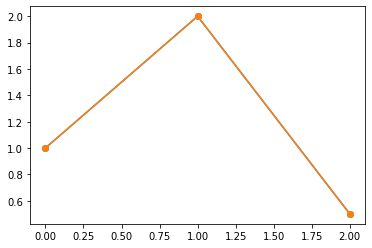

In [5]:
print(h)
print(h_est)
plt.plot(h, "o-")
plt.plot(h_est, "o-")
pass

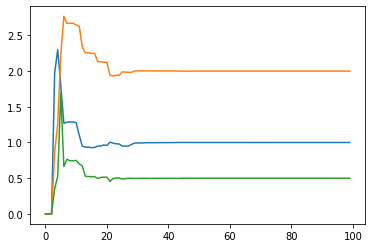

In [6]:
plt.plot(h_est_history)
pass